<a href="https://colab.research.google.com/github/Rahul-phyton-code/SMOTE-UPHANDLING-TECHNIQUE/blob/main/SMOTE_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMOTE (Synthetic Minority Over-sampling Technique) **is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

SMOTE is one of the upsampling technique:-

step 1 - Connect all the data points

step2 - Then interpolating new points between them



What is the problem with previous upsampling technique???

Ans. In previous upsampling technique , more data points added on the same space , since my data accumulate in the same position by which {[ VARIANCE NOT INCREASING AT ALL]} , so to [increase the variance] we have to use interpolating technique ~ SMOTE(CREATING OWN SYNTHETIC DATA)

X-------------------------------X
  
  XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

SMOTE try to join 2 nearest points then it try to add new data points on this line(data that creates also have variance)  

In [ ]:
# STEP 1 - CREATE DATASET
# New library make_classification(helps to create binary/multiple classification) to create dataset
from sklearn.datasets import make_classification

# X = independent(Input) feature  , Y = dependent(Output) feature

               #(take 1000 datapoints , for 2d analysis , want 1 cluster per class , one class 90% more than other class w.r.t o/p feature , take 12 seed)
X,Y = make_classification(n_samples = 1000 , n_redundant= 0 ,  n_features = 2 , n_clusters_per_class = 1 , weights = [0.90] , random_state = 12)
X,Y

# First output is my input feature(X)
# second output is my output feature(Y)



(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# SIZE OF INDEPENDENT VARIABLE
X.shape

(1000, 2)

In [ ]:
# SIZE OF DEPENDENT VARIABLE
Y.shape

(1000,)

In [ ]:
# STEP2 - CREATE IMBALANCE DATASETS TO DO SMOTE OPERATION
import pandas as pd

# Input Feature(X) consider as 'f1' and 'f2' column
df1 = pd.DataFrame(X,columns=['f1','f2'])

# Output Feature(Y) consider as 'target' column
df2 = pd.DataFrame(Y,columns=['target'])

# Do concatenation(along column) for making imbalance sets
final_df = pd.concat([df1,df2],axis=1)
final_df.head()


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [ ]:
final_df['target'].value_counts()

# INSIGHTS - IT IS AN IMBALANCED DATASET (NOW WE CAN SEE HOW TO APPLY SMOTE TECHNIQUE ])

0    900
1    100
Name: target, dtype: int64

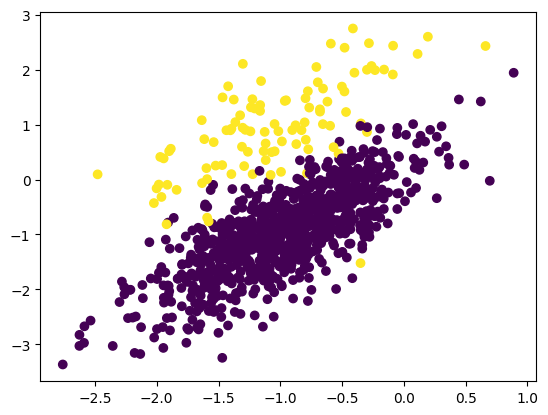

In [ ]:
# ALSO CHECK IMBALANCE DATASET BY VISUALISATION
import matplotlib.pyplot as plt

# from final_df  dataframe take - f1 , f2 and target
plt.scatter(final_df['f1'],final_df['f2'],c = final_df['target'])



# INSIGHTS -  ### 'f1 and 'f2' are in light colour which doesn't matter , for target we use 'c' - so graph shows 'target' major & minor data points.
#            1.) It's Clear that [below dark purple colour] certainly be Major Data Points (900 0's datapoints) - means 'target' in final_df  dataframe
#            2.) It's Clear that [Above dark yellow colour] certainly be Minor Data Points (100 1's datapoints) - means 'target' in final_df  dataframe
#            3.) In this upsampling technique , we can see that almost more than datapoints one above another - so, my data accumulate in same position
#                in short , variance not increasing at all. [So, it's crucial to use SMOTE Technique to increase variance] 

In [ ]:
# Time to apply SMOTE Technique
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

# one line code convert lower datapoints to higher datapoints via SMOTE technique
oversample = SMOTE()
X,Y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
X.shape

# CAN SAY IT IS OVERSAMPLED BY SMOTE TECHNIQUE

(1800, 2)

In [ ]:
Y.shape

# 900 (0 DATA POINTS)
# 900 (1 DATA POINTS)

(1800,)

In [ ]:
# check with respect to output feature(Y) how many 0's and 1's we have
Y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [ ]:
Y[Y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [ ]:
len(Y[Y==0])

900

In [ ]:
len(Y[Y==1])

900

In [ ]:
# NOW SEE BEAUTY OF SMOTE BY VISUALISATION
# NOW X and Y are Oversampled by SMOTE Technique
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1','f2'])
df2 = pd.DataFrame(Y,columns=['target'])
df_oversampled = pd.concat([df1,df2],axis=1)
df_oversampled


,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.548041,0.238062,1
1796,-1.716468,0.619219,1
1797,-0.368010,1.941101,1
1798,-1.359239,1.482395,1


In [ ]:
df_oversampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

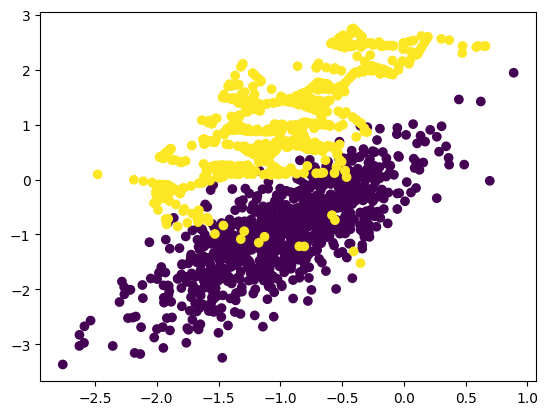

In [ ]:
plt.scatter(df_oversampled['f1'],df_oversampled['f2'],c=df_oversampled['target'])


# INSIGHTS -  ### 'f1 and 'f2' are in light colour which doesn't matter , for target we use 'c' - so graph shows 'target' major & minor data points.

# 1.) Not SMOTE [(VARIANCE(SPREADING) NOT INCREASING AT ALL)]-----It's Clear that [below dark purple colour] certainly be Major Data Points (900 0's datapoints) 
# {same as earlier} - means 'target' in final_df  dataframe (data points one above another)

# 2.) SMOTE [VARIANCE(SPREADING) INCREASING]-----But now [Above dark yellow colour] which is certainly be Minor Data Point, How beautifully with the help of 
# SMOTE Technique minor data points (100 1's datapoints) oversampled to (900 1's datapoints) means 'target' in final_df  dataframe - Now we are able to 
# to apply machine learning algorithm to solve classsification problem w.r.t this particulat data set.

# 3.) By SMOTE [Above dark yellow colour] - SEE HOW TREMENDOUSLY DATA POINTS CONNECTED ONE BY ONE